### 📊 Analysis Script with Visualizations

✅ Dataset loaded. Shape: (6788, 11)

📊 Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6788 entries, 0 to 6787
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   last_name       6784 non-null   object
 1   initials        6745 non-null   object
 2   street_name     6788 non-null   object
 3   house_number    6779 non-null   object
 4   postal_code     6779 non-null   object
 5   city            6788 non-null   object
 6   phone_number    6788 non-null   object
 7   date_of_birth   4054 non-null   object
 8   account_number  6574 non-null   object
 9   iban            6788 non-null   object
 10  email           6781 non-null   object
dtypes: object(11)
memory usage: 583.5+ KB
None
       last_name initials  street_name house_number postal_code       city  \
count       6784     6745         6788         6779        6779       6788   
unique      4659     1273         5005          475         5

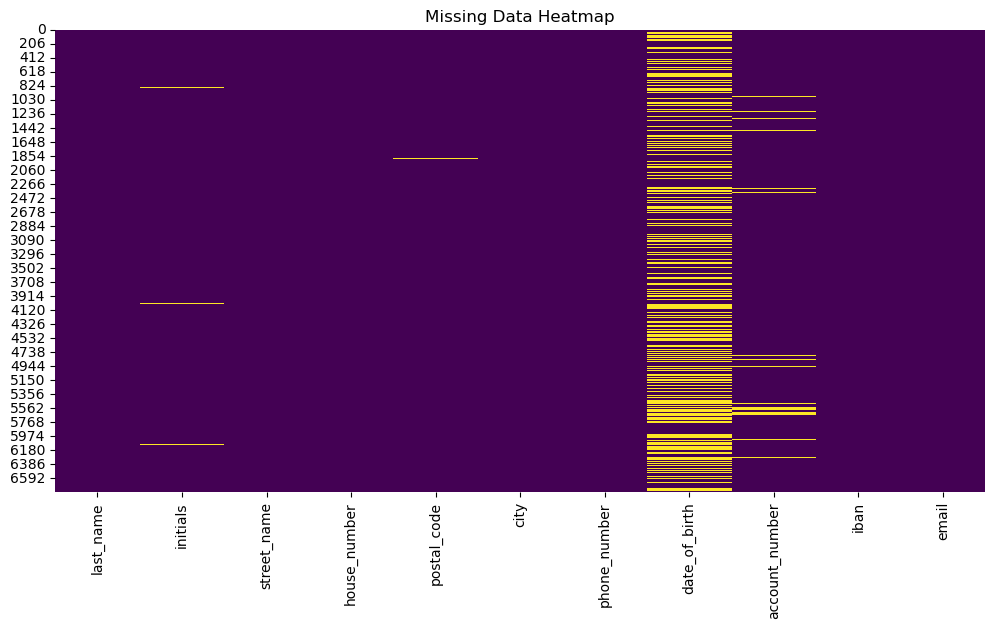


⚠️ Duplicate IBAN count: 132
⚠️ Duplicate Account Number count: 4077


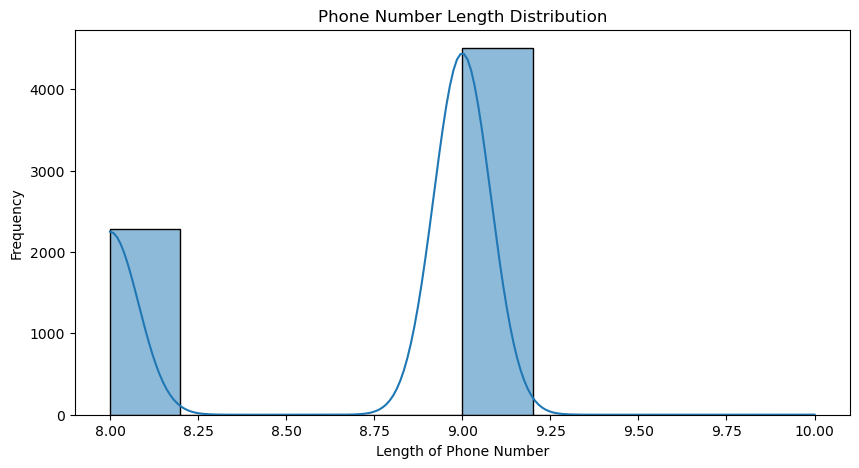

TypeError: argument of type 'float' is not iterable

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
file_path = r'C:\Users\Andre\OneDrive\Documents\Belgium-Bank-Dataset\output\belgium_bank_clean_data_final2.csv'
df = pd.read_csv(file_path, dtype=str)
print(f"✅ Dataset loaded. Shape: {df.shape}")

# --- 1. Summary Statistics ---
print("\n📊 Dataset Summary:")
print(df.info())
print(df.describe(include='all'))

# --- 2. Missing Data Heatmap ---
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# --- 3. Duplicates Check ---
iban_dups = df['iban'].duplicated().sum()
account_dups = df['account_number'].duplicated().sum()
print(f"\n⚠️ Duplicate IBAN count: {iban_dups}")
print(f"⚠️ Duplicate Account Number count: {account_dups}")

# --- 4. Phone Number Length Distribution ---
df['phone_number_length'] = df['phone_number'].apply(lambda x: len(str(x)))
plt.figure(figsize=(10,5))
sns.histplot(df['phone_number_length'], bins=10, kde=True)
plt.title('Phone Number Length Distribution')
plt.xlabel('Length of Phone Number')
plt.ylabel('Frequency')
plt.show()

# --- 5. Email Domain Distribution (Top 10) ---
df['email_domain'] = df['email'].apply(lambda x: x.split('@')[1] if '@' in x else 'Invalid')
top_domains = df['email_domain'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_domains.values, y=top_domains.index)
plt.title('Top 10 Email Domains')
plt.xlabel('Number of Occurrences')
plt.ylabel('Email Domain')
plt.show()

# --- 6. IBAN Country Check (all should start with BE) ---
df['iban_country'] = df['iban'].apply(lambda x: x[:2])
iban_country_dist = df['iban_country'].value_counts()

plt.figure(figsize=(6,4))
iban_country_dist.plot(kind='bar', color='orange')
plt.title('IBAN Country Code Distribution')
plt.ylabel('Count')
plt.show()

# --- 7. Sample of Cleaned Data ---
print("\n✅ Sample of Cleaned Data:")
print(df.head())

# --- 8. Export Dataset Overview (Optional for documentation purposes) ---
overview_path = r'C:\Users\Andre\OneDrive\Documents\Belgium-Bank-Dataset\output\belgium_bank_data_overview.csv'
df.describe(include='all').to_csv(overview_path)
print(f"\n📁 Dataset overview saved to: {overview_path}")


✅ Dataset loaded. Shape: (6788, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6788 entries, 0 to 6787
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   last_name       6784 non-null   object
 1   initials        6745 non-null   object
 2   street_name     6788 non-null   object
 3   house_number    6779 non-null   object
 4   postal_code     6779 non-null   object
 5   city            6788 non-null   object
 6   phone_number    6788 non-null   object
 7   date_of_birth   4054 non-null   object
 8   account_number  6574 non-null   object
 9   iban            6788 non-null   object
 10  email           6781 non-null   object
dtypes: object(11)
memory usage: 583.5+ KB
None


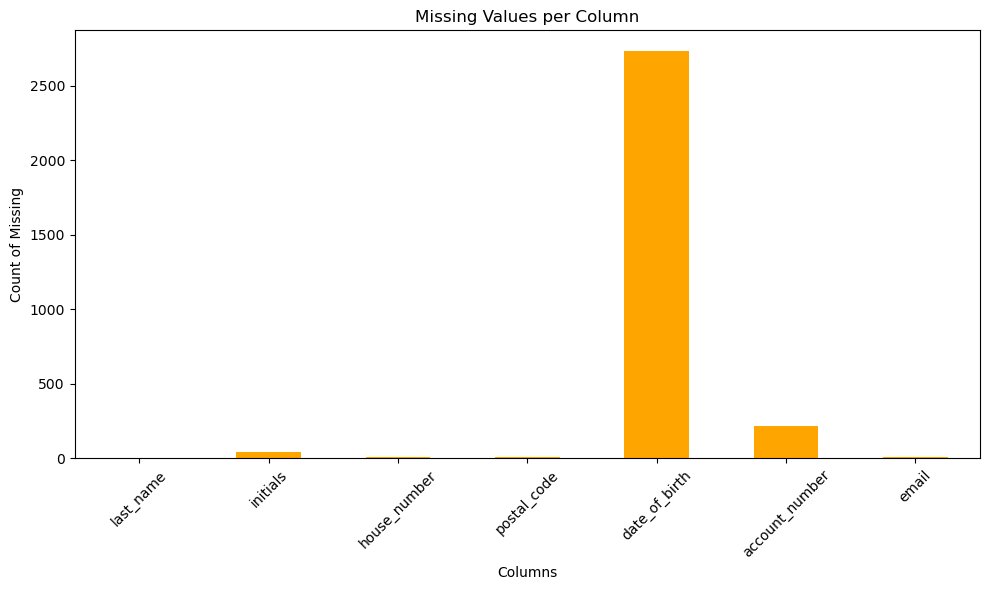

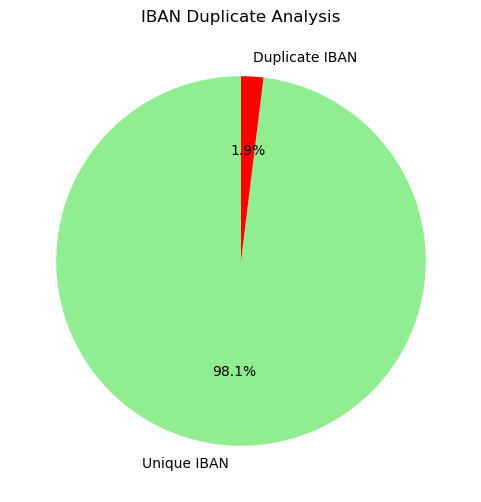

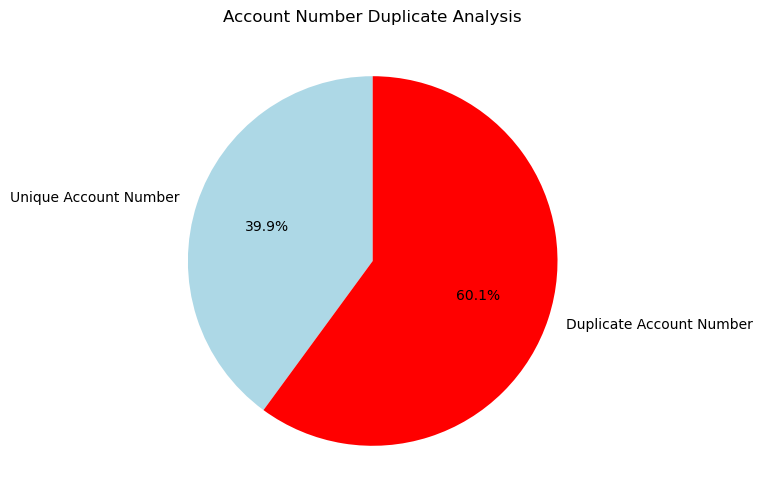

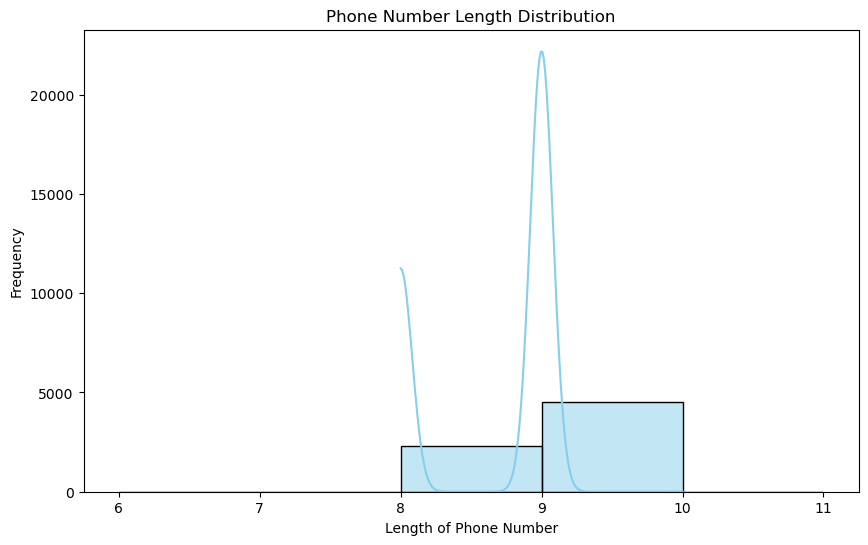

C:\Users\Andre\AppData\Local\Temp\ipykernel_2828\972085120.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_domains.index, y=top_domains.values, palette='Blues_d')


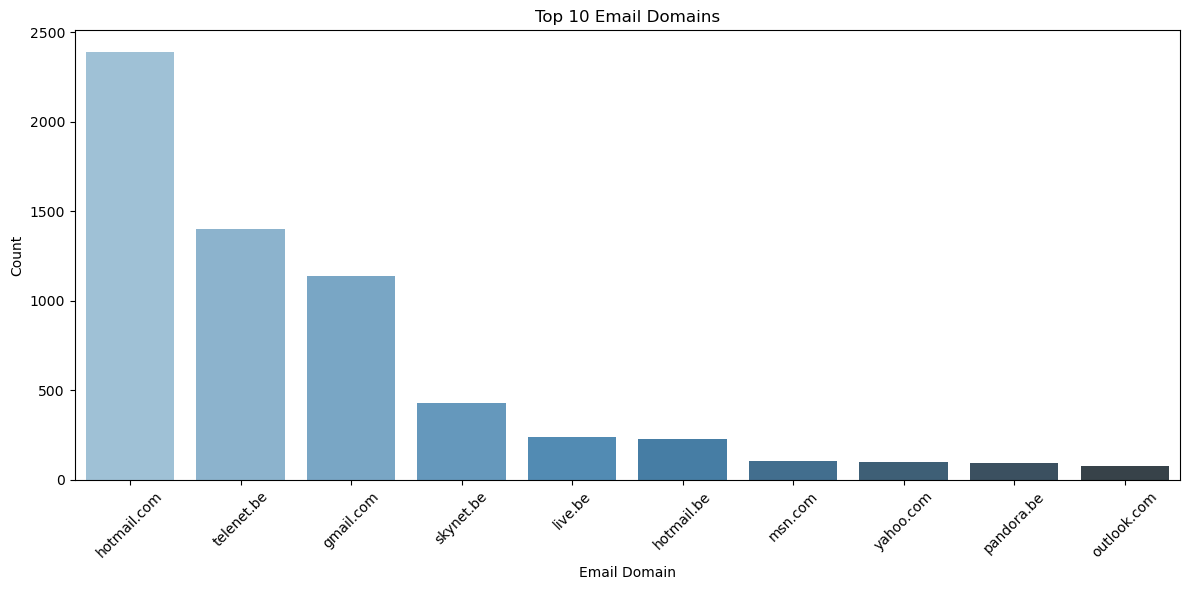

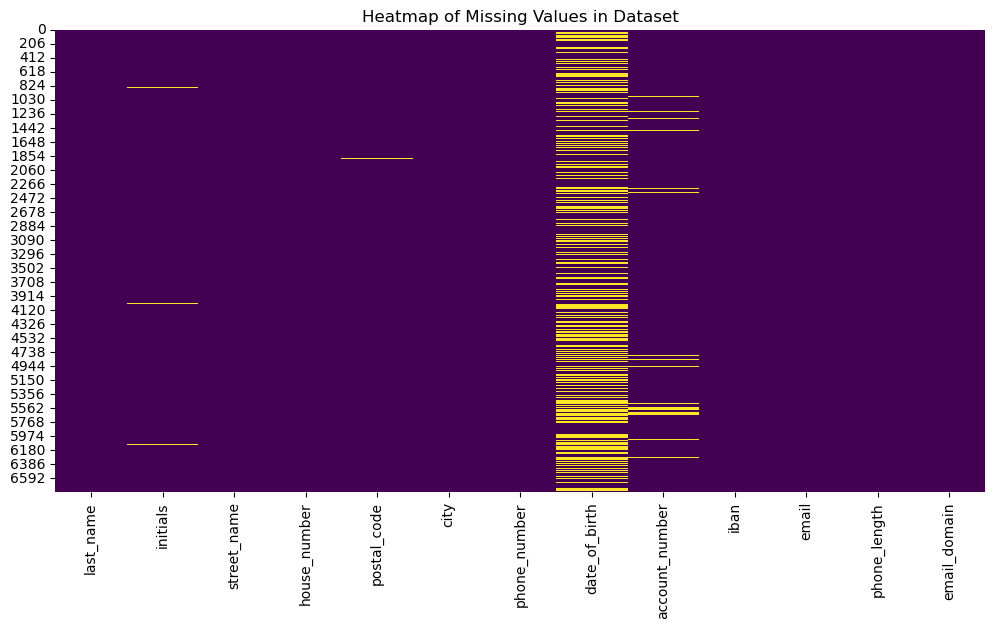


📊 **Final Dataset Summary**
Total Records: 6788
Duplicate IBAN Count: 132
Duplicate Account Number Count: 4077
Columns with Missing Data: {'last_name': 4, 'initials': 43, 'house_number': 9, 'postal_code': 9, 'date_of_birth': 2734, 'account_number': 214, 'email': 7}


TypeError: Object of type int64 is not JSON serializable

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Load dataset
file_path = r'C:\Users\Andre\OneDrive\Documents\Belgium-Bank-Dataset\output\belgium_bank_clean_data_final2.csv'
df = pd.read_csv(file_path, dtype=str)
print("✅ Dataset loaded. Shape:", df.shape)
print(df.info())

# ---- 1. Prepare Summary ----
# Handle missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].astype(int)  # Convert to Python int

# Handle duplicates
iban_dups = int(df['iban'].duplicated().sum())  # Convert to Python int
acc_dups = int(df['account_number'].duplicated().sum())  # Convert to Python int

# Summary dictionary (converted to native types)
summary = {
    'Total Records': int(df.shape[0]),
    'Duplicate IBAN Count': iban_dups,
    'Duplicate Account Number Count': acc_dups,
    'Columns with Missing Data': missing_values.to_dict()
}

# ✅ Now safe to save as JSON
with open(r'C:\Users\Andre\OneDrive\Documents\Belgium-Bank-Dataset\output\belgium_bank_data_summary.json', 'w') as f:
    json.dump(summary, f, indent=4)

print("\n✅ Analysis complete and summary saved.")
print("\n📊 **Final Dataset Summary**")
for key, value in summary.items():
    print(f"{key}: {value}")

# ---- 2. Visualizations ----

# ✅ Missing values bar chart
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='orange')
plt.title('Missing Values per Column')
plt.ylabel('Count of Missing')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ✅ IBAN Duplicate pie chart
labels = ['Unique IBAN', 'Duplicate IBAN']
sizes = [df.shape[0] - iban_dups, iban_dups]
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'red'])
plt.title('IBAN Duplicate Analysis')
plt.show()

# ✅ Account Number Duplicate pie chart
labels_acc = ['Unique Account Number', 'Duplicate Account Number']
sizes_acc = [df.shape[0] - acc_dups, acc_dups]
plt.figure(figsize=(6, 6))
plt.pie(sizes_acc, labels=labels_acc, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'red'])
plt.title('Account Number Duplicate Analysis')
plt.show()

# ✅ Phone Number length histogram
df['phone_length'] = df['phone_number'].apply(lambda x: len(str(x).strip()) if pd.notnull(x) else 0)
plt.figure(figsize=(10, 6))
sns.histplot(df['phone_length'], bins=range(6, 12), kde=True, color='skyblue', edgecolor='black')
plt.title('Phone Number Length Distribution')
plt.xlabel('Length of Phone Number')
plt.ylabel('Frequency')
plt.show()

# ✅ Top 10 Email domains
df['email_domain'] = df['email'].apply(lambda x: x.split('@')[1] if isinstance(x, str) and '@' in x else 'Invalid')
top_domains = df['email_domain'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_domains.index, y=top_domains.values, palette='Blues')
plt.title('Top 10 Email Domains')
plt.xlabel('Email Domain')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ✅ Heatmap of missing data
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values in Dataset')
plt.show()




### ✅ Solution — Convert to Native Python Types:
You can cast these values to int or str when building the dictionary. Here's how to fix this:

🔑 Option 1: Convert individual items during dictionary creation

In [2]:
summary = {
    'Total Records': int(df.shape[0]),
    'Duplicate IBAN Count': int(df['iban'].duplicated().sum()),
    'Duplicate Account Number Count': int(df['account_number'].duplicated().sum()),
    'Columns with Missing Data': {col: int(df[col].isna().sum()) for col in df.columns if df[col].isna().sum() > 0}
}


###🔑 Option 2: Custom converter function for JSON (if mixed types):

In [4]:
import json
import numpy as np

def convert_to_builtin_type(obj):
    if isinstance(obj, (np.int64, np.int32, np.float64, np.float32)):
        return int(obj)  # or float(obj) depending on expected output
    raise TypeError(f"Type {type(obj)} not serializable")

with open(r'C:\Users\Andre\OneDrive\Documents\Belgium-Bank-Dataset\output\belgium_bank_data_summary.json', 'w') as f:
    json.dump(summary, f, indent=4, default=convert_to_builtin_type)

print("\n✅ Analysis complete and summary saved.")
print("\n📊 **Final Dataset Summary**")

for key, value in summary.items():
    print(f"{key}: {value}")

# Example of correctly formatted summary
summary = {
    'Total Records': int(df.shape[0]),
    'Duplicate IBAN Count': int(df['iban'].duplicated().sum()),
    'Duplicate Account Number Count': int(df['account_number'].duplicated().sum()),
    'Columns with Missing Data': {col: int(df[col].isna().sum()) for col in df.columns if df[col].isna().sum() > 0}
}

# Save as JSON
with open(r'C:\Users\Andre\OneDrive\Documents\Belgium-Bank-Dataset\output\belgium_bank_data_summary.json', 'w') as f:
    json.dump(summary, f, indent=4)

print("\n✅ Analysis complete and summary saved.")




✅ Analysis complete and summary saved.

📊 **Final Dataset Summary**
Total Records: 6788
Duplicate IBAN Count: 132
Duplicate Account Number Count: 4077
Columns with Missing Data: {'last_name': 4, 'initials': 43, 'house_number': 9, 'postal_code': 9, 'date_of_birth': 2734, 'account_number': 214, 'email': 7}

✅ Analysis complete and summary saved.


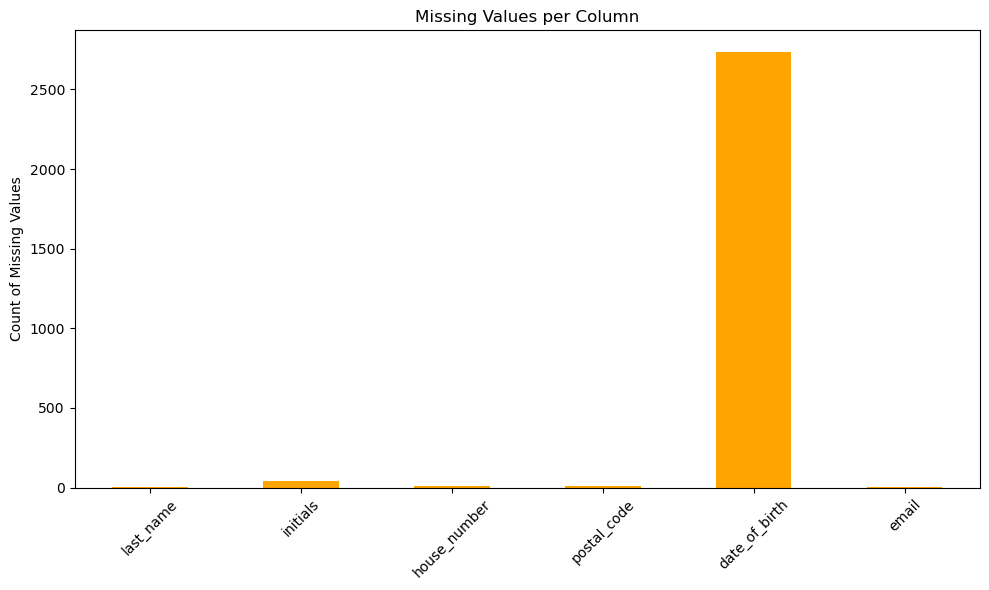

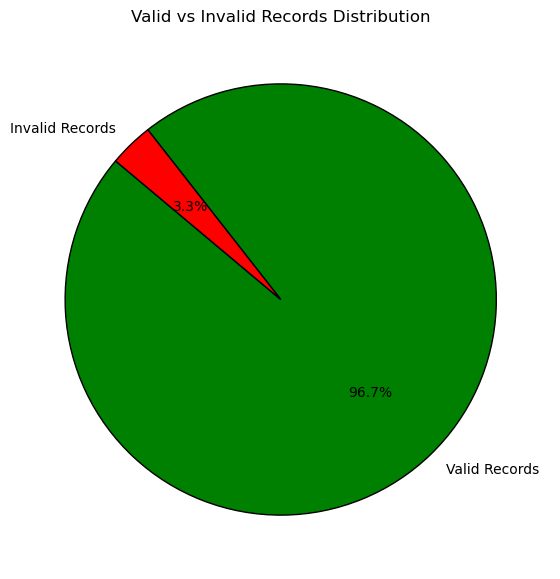

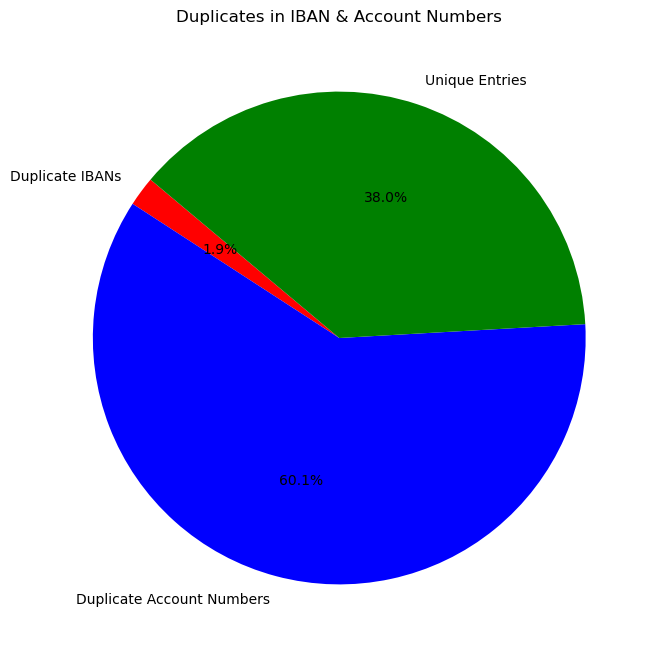

C:\Users\Andre\AppData\Local\Temp\ipykernel_2828\3230689309.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_domains.index, y=top_domains.values, palette='Blues_d')


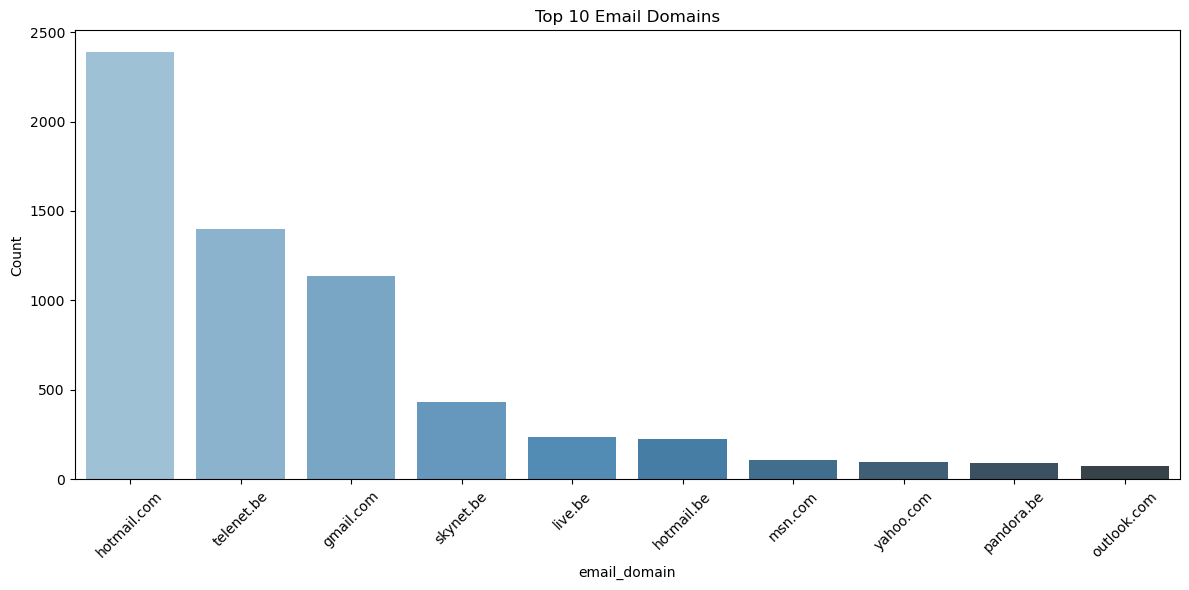

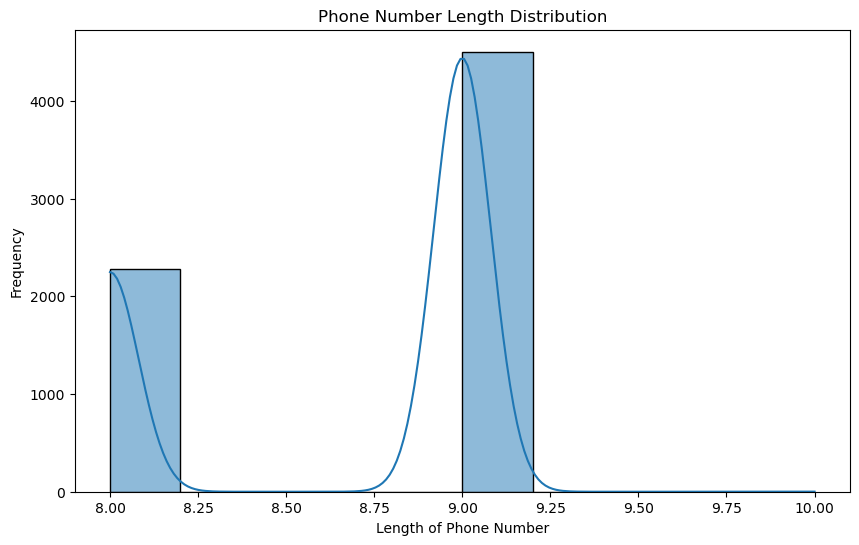

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r'C:\Users\Andre\OneDrive\Documents\Belgium-Bank-Dataset\output\belgium_bank_clean_data_final2.csv', dtype=str)

# Convert columns to proper types where needed
df['account_number'] = df['account_number'].astype(str)
df['iban'] = df['iban'].astype(str)

# --- 1. Missing Data Bar Chart ---
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]

plt.figure(figsize=(10,6))
missing_data.plot(kind='bar', color='orange')
plt.title('Missing Values per Column')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- 2. Duplicates Check ---
iban_dups = df['iban'].duplicated().sum()

# Load the dataset
df = pd.read_csv(r'C:\Users\Andre\OneDrive\Documents\Belgium-Bank-Dataset\output\belgium_bank_clean_data_final2.csv', dtype=str)

# --- Identify Valid/Invalid rows based on key fields ---
# You can adjust this rule depending on what is "critical" for validity
required_fields = ['last_name', 'account_number', 'iban', 'email', 'phone_number']

# Count rows missing any of the required fields
df['is_valid'] = df[required_fields].notnull().all(axis=1)

# Count valid vs invalid rows
valid_count = df['is_valid'].sum()
invalid_count = len(df) - valid_count

# --- Pie Chart for Visualizing Valid vs Invalid Records ---
labels = ['Valid Records', 'Invalid Records']
sizes = [valid_count, invalid_count]
colors = ['green', 'red']

plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Valid vs Invalid Records Distribution')
plt.show()


# --- 2. Duplicates Pie Chart (IBAN + Account Number) ---
iban_dups = df['iban'].duplicated().sum()
account_dups = df['account_number'].duplicated().sum()

labels = ['Duplicate IBANs', 'Duplicate Account Numbers', 'Unique Entries']
sizes = [iban_dups, account_dups, len(df) - (iban_dups + account_dups)]

plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['red', 'blue', 'green'])
plt.title('Duplicates in IBAN & Account Numbers')
plt.show()

# --- 3. Email Domain Distribution ---
df['email_domain'] = df['email'].apply(lambda x: x.split('@')[1] if pd.notnull(x) and '@' in x else 'Invalid')
top_domains = df['email_domain'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_domains.index, y=top_domains.values, palette='Blues_d')
plt.title('Top 10 Email Domains')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- 4. Phone Number Length Distribution ---
df['phone_number_length'] = df['phone_number'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

plt.figure(figsize=(10,6))
sns.histplot(df['phone_number_length'], bins=10, kde=True)
plt.title('Phone Number Length Distribution')
plt.xlabel('Length of Phone Number')
plt.ylabel('Frequency')
plt.show()
